<a href="https://colab.research.google.com/github/krec7748/DeepLearning_Study/blob/main/Computation%20of%20deep%20learning%20network/CH07_Convolutional_Neural_Networks.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. Shapes in CNNs

### 1. Shapes in the Feature Extractors

In [ ]:
import tensorflow as tf
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten

#Set minibatch, height, width, number of channels
N, n_H, n_W, n_C = 32, 28, 28, 3

#Set number of filters, kernel_size, pool_size, strides
n_conv_filter, k_size = 5, 3
pool_size, pool_strides = 2, 2

#Input setting
x = tf.random.normal(shape = (N, n_H, n_W, n_C))

#Layers setting
conv1 = Conv2D(filters = n_conv_filter, kernel_size = k_size, padding = "same", activation = "relu")
conv1_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)
conv2 = Conv2D(filters = n_conv_filter, kernel_size = k_size, padding = "same", activation = "relu")
conv2_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)
flatten = Flatten()

#FP & Confirm
print("Input: {}\n".format(x.shape)) #(32, 28, 28, 3)

x = conv1(x)
W1, B1 = conv1.get_weights()
print("W/B: {}/{}".format(W1.shape, B1.shape)) #(3, 3, 3, 5) / (5, )
print("After conv1: {}\n".format(x.shape)) # (32, 28, 28, 5)

x = conv1_pool(x)
print("After conv1_pool: {}\n".format(x.shape)) #(32, 14, 14, 5)

x = conv2(x)
W2, B2 = conv2.get_weights()
print("W/B: {}/{}".format(W2.shape, B2.shape)) #(3, 3, 5, 5) / (5, )
print("After conv2: {}\n".format(x.shape)) #(32, 14, 14, 5)

x = conv2_pool(x)
print("After conv2_pool: {}\n".format(x.shape)) #(32, 7, 7, 5)

x = flatten(x)
print("After flatten: {}\n".format(x.shape)) #(32, 245)

Input: (32, 28, 28, 3)

W/B: (3, 3, 3, 5)/(5,)
After conv1: (32, 28, 28, 5)

After conv1_pool: (32, 14, 14, 5)

W/B: (3, 3, 5, 5)/(5,)
After conv2: (32, 14, 14, 5)

After conv2_pool: (32, 7, 7, 5)

After flatten: (32, 245)



### 2. Shapes in the Classifier

In [ ]:
from tensorflow.keras.layers import Dense

#Set number of neurons (layer by layer)
n_neurons = [50, 25, 10]

#Layers setting
dense_01 = Dense(units = n_neurons[0], activation = "relu")
dense_02 = Dense(units = n_neurons[1], activation = "relu")
dense_03 = Dense(units = n_neurons[2], activation = "softmax")

#FP & Confirm
print("Input feature: {}".format(x.shape), "\n") #(32, 245)

x = dense_01(x)
W1, B1 = dense_01.get_weights()
print("W/B: {}/{}".format(W1.shape, B1.shape)) #(245, 50) / (50, )
print("After dense_01: {}\n".format(x.shape)) #(32, 50)

x = dense_02(x)
W2, B2 = dense_02.get_weights()
print("W/B: {}/{}".format(W2.shape, B2.shape)) #(50, 25) / (25, )
print("After dense_02: {}\n".format(x.shape)) #(32, 25)

x = dense_03(x)
W3, B3 = dense_03.get_weights()
print("W/B: {}/{}".format(W3.shape, B3.shape)) #(25, 10) / (10, )
print("After dense_03: {}\n".format(x.shape)) #(32, 10)

Input feature: (32, 245) 

W/B: (245, 50)/(50,)
After dense_01: (32, 50)

W/B: (50, 25)/(25,)
After dense_02: (32, 25)

W/B: (25, 10)/(10,)
After dense_03: (32, 10)



### 3. Shapes in the Loss Functions

In [ ]:
from tensorflow.keras.losses import CategoricalCrossentropy

#Labels setting
y = tf.random.uniform(shape = (32, ), minval = 0, maxval = 10, dtype = tf.int32)
y = tf.one_hot(y, depth = 10)

#Set loss function
loss_object = CategoricalCrossentropy()

#Get loss
loss = loss_object(y, x)

#Confirm
print(loss.shape) #scalar
print(loss)

()
tf.Tensor(2.6458278, shape=(), dtype=float32)


## 2. Implementation of CNNs

### 1. Implementation with Sequential Method

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#Set minibatch, height, width, number of channels
N, n_H, n_W, n_C = 4, 28, 28, 3

#Set number of neurons (layer by layer)
n_conv_neurons = [10, 20 ,30]
n_dense_neurons = [50, 30, 10]

#Set kernel_size, pool_size, strides
k_size, padding = 3, "same"
pool_size, pool_strides = 2, 2

#Set activation function
activation = "relu"

#Input setting
x = tf.random.normal(shape = (N, n_H, n_W, n_C))

#Layers setting

##1. Create Model
model = Sequential()

##2. Feature extractor
for n_conv_neuron in n_conv_neurons:
    model.add(Conv2D(filters = n_conv_neuron, kernel_size = k_size, padding = padding, activation = activation))
    model.add(MaxPooling2D(pool_size = pool_size, strides = pool_strides))

model.add(Flatten())

##3. Classifier
for n_dense_neuron in n_dense_neurons[:-1]:
    model.add(Dense(units = n_dense_neuron, activation = activation))

model.add(Dense(units = n_dense_neurons[-1], activation = "softmax"))

#FP & Confirm
predictions = model(x)
print(x.shape)
print(predictions.shape)

(4, 28, 28, 3)
(4, 10)


### 2. Implementation with Model Sub-classing

In [ ]:
#실제 연구/개발에서 네트워크 안에서 벌어지는 일들을 Sequential Method로는 알기 힘들다. (Sub classing 모델의 필요성)

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense

#TestCNN Implementation
class TestCNN(Model):
    def __init__(self):
        super(TestCNN, self).__init__()
        
        self.conv1 = Conv2D(filters = n_conv_neurons[0], kernel_size = k_size, padding = padding, activation = activation)
        self.conv1_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)

        self.conv2 = Conv2D(filters = n_conv_neurons[1], kernel_size = k_size, padding = padding, activation = activation)
        self.conv2_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)

        self.conv3 = Conv2D(filters = n_conv_neurons[2], kernel_size = k_size, padding = padding, activation = activation)
        self.conv3_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)

        self.flatten = Flatten()

        self.dense1 = Dense(units = n_dense_neurons[0], activation = activation)
        self.dense2 = Dense(units = n_dense_neurons[1], activation = activation)
        self.dense3 = Dense(units = n_dense_neurons[2], activation = "softmax")

    def call(self, x):
        print(x.shape)
        x = self.conv1(x)
        print(x.shape)
        x = self.conv1_pool(x)
        print(x.shape)

        x = self.conv2(x)
        print(x.shape)
        x = self.conv2_pool(x)
        print(x.shape)

        x = self.conv3(x)
        print(x.shape)
        x = self.conv3_pool(x)
        print(x.shape)

        x = self.flatten(x)
        print(x.shape)

        x = self.dense1(x)
        print(x.shape)
        x = self.dense2(x)
        print(x.shape)
        x = self.dense3(x)
        print(x.shape)

        return x

#Set minibatch, height, width, number of channels
N, n_H, n_W, n_C = 4, 28, 28, 3

#Set number of neurons (layer by layer)
n_conv_neurons = [10, 20 ,30]
n_dense_neurons = [50, 30, 10]

#Set kernel_size, pool_size, strides
k_size, padding = 3, "same"
pool_size, pool_strides = 2, 2

#Set activation function
activation = "relu"

#Input setting
x = tf.random.normal(shape = (N, n_H, n_W, n_C))

#Create sub-classing model
model = TestCNN()

#FP & Confirm
y = model(x)

(4, 28, 28, 3)
(4, 28, 28, 10)
(4, 14, 14, 10)
(4, 14, 14, 20)
(4, 7, 7, 20)
(4, 7, 7, 30)
(4, 3, 3, 30)
(4, 270)
(4, 50)
(4, 30)
(4, 10)


In [ ]:
#Sub-classing 모델을 이용하면 네트워크에서 무슨 일이 일어나는지 (shape) 알 수 있음.
#그렇다고 코드를 이렇게 짜면 복잡하고 귀찮고 디버깅도 힘듬.

### 3. Implementation with Sequential + Layer Sub-classing

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Flatten, Dense

#Custom Conv Layer Implementation
class MyConv(Layer):
    def __init__(self, n_neuron):
        super(MyConv, self).__init__()
        self.conv = Conv2D(filters = n_neuron, kernel_size = k_size, padding = padding, activation = activation)
        self.conv_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)

    def call(self, x):
        x = self.conv(x)
        x = self.conv_pool(x)
        return x

#Layers setting
model = Sequential()
model.add(MyConv(n_conv_neurons[0]))
model.add(MyConv(n_conv_neurons[1]))
model.add(MyConv(n_conv_neurons[2]))
model.add(Flatten())
model.add(Dense(units = n_dense_neurons[0], activation = activation))
model.add(Dense(units = n_dense_neurons[1], activation = activation))
model.add(Dense(units = n_dense_neurons[2], activation = "softmax"))

### 4. Implementation with Model and Layer Sub-classing

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Flatten, Dense

#TestCNN Implementation
class MyConv(Layer):
    def __init__(self, n_neuron):
        super(MyConv, self).__init__()

        self.conv = Conv2D(filters = n_neuron, kernel_size = k_size, padding = padding, activation = activation)
        self.conv_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)

    def call(self, x):
        x = self.conv(x)
        x = self.conv_pool(x)
        return x

class TestCNN(Model):
    def __init__(self):
        super(TestCNN, self).__init__()
        self.conv1 = MyConv(n_conv_neurons[0])
        self.conv2 = MyConv(n_conv_neurons[1])
        self.conv3 = MyConv(n_conv_neurons[2])
        self.flatten = Flatten()

        self.dense1 = Dense(units = n_dense_neurons[0], activation = activation)
        self.dense2 = Dense(units = n_dense_neurons[1], activation = activation)
        self.dense3 = Dense(units = n_dense_neurons[2], activation = "softmax")

    def call(self, x):
        x = self.conv1(x)
        x = self.conv2(x)
        x = self.conv3(x)
        x = self.flateen(x)

        x = self.dense1(x)
        x = self.dense2(x)
        x = self.dense3(x)

        return x

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import Layer, Conv2D, MaxPooling2D, Flatten, Dense

#TestCNN Implementation
class MyConv(Layer):
    def __init__(self, n_neuron):
        super(MyConv, self).__init__()

        self.conv = Conv2D(filters = n_neuron, kernel_size = k_size, padding = padding, activation = activation)
        self.conv_pool = MaxPooling2D(pool_size = pool_size, strides = pool_strides)

    def call(self, x):
        x = self.conv(x)
        x = self.conv_pool(x)
        return x

class TestCNN(Model):
    def __init__(self, n_neuron):
        super(TestCNN, self).__init__()
        
        self.feature_extractor = Sequential()
        for n_conv_neuron in n_conv_neurons:
            self.feature_extractor.add(MyConv(n_conv_neuron))

        self.feature_extractor.add(Flatten())

        self.classifier = Sequential()
        for n_dense_neuron in n_dense_neurons[:-1]:
            self.classifier.add(Dense(units = n_dense_neuron, activation = activation))
        self.classifier.add(Dense(units = n_dense_neurons[-1], activation = "softmax"))

    def call(self, x):
        x = self.feature_extractor(x)
        x = self.classifier(x)
        return x

## 3. Implementation of LeNet

LeNet: 사람의 손 글씨 숫자 0 ~ 9까지를 분류하는 모델

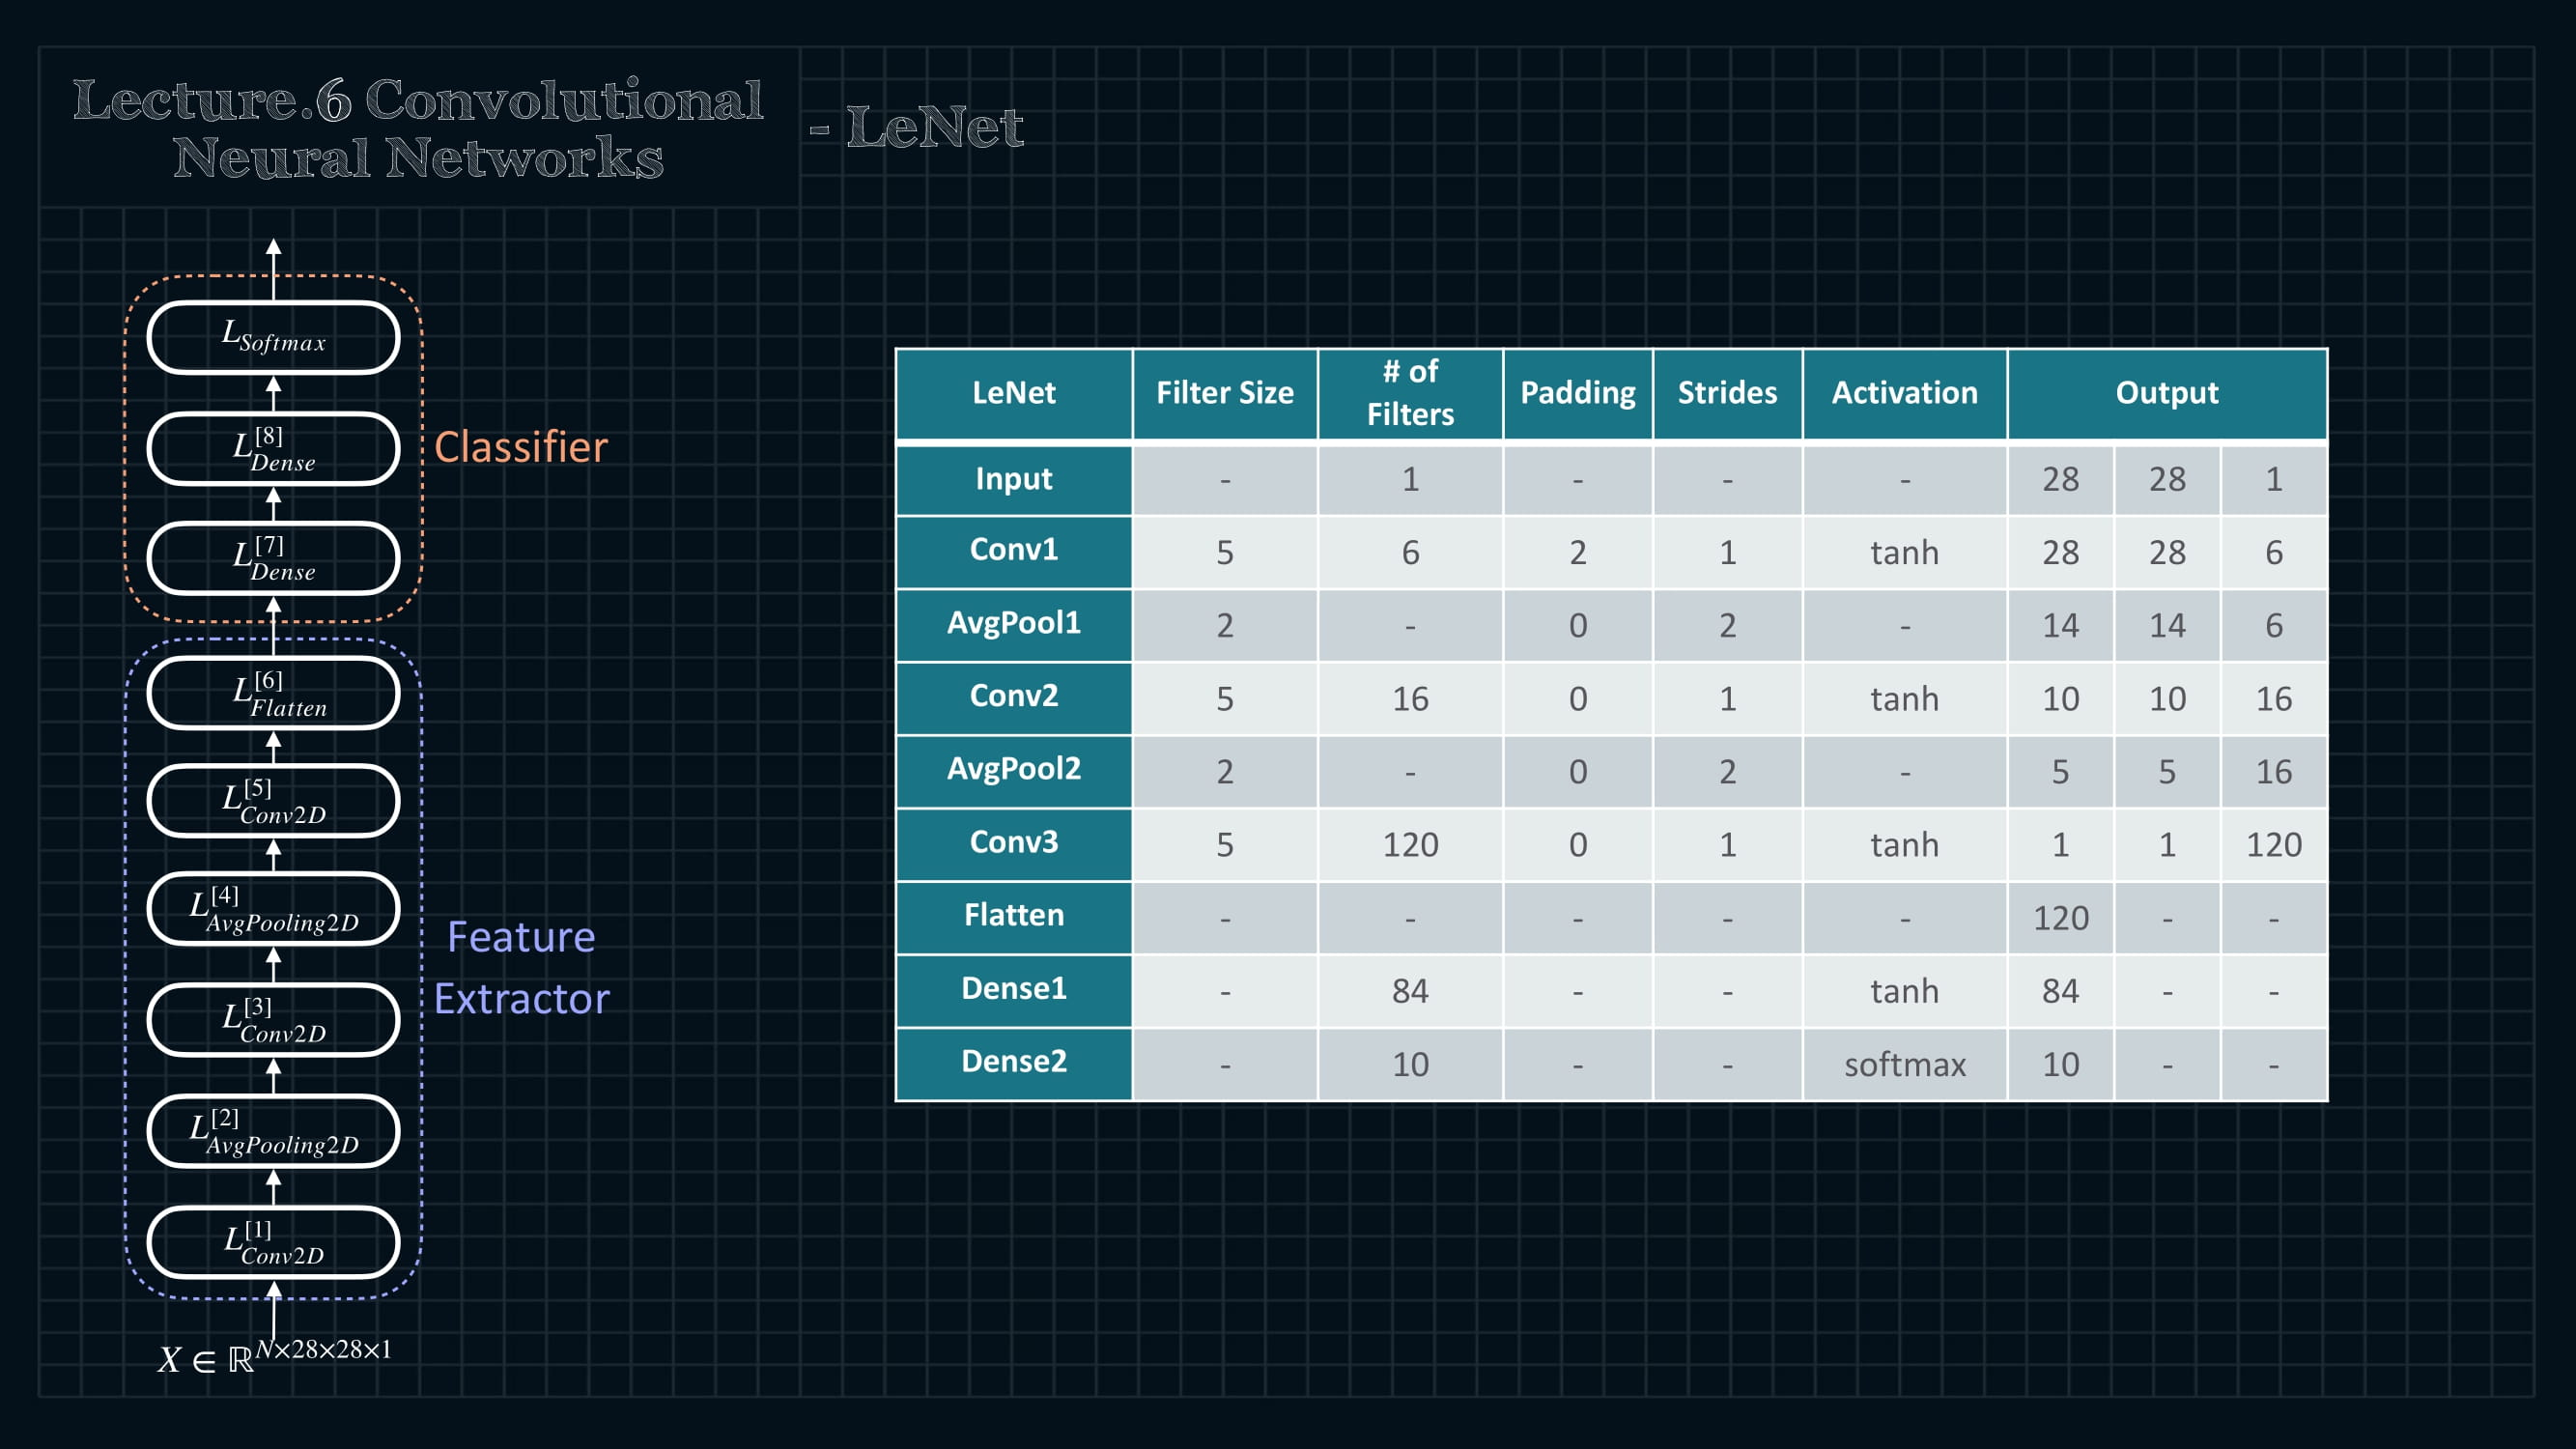

### 1. LeNet with Model Sub-classing

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Conv2D, AveragePooling2D, Flatten, Dense

#LeNet Implementation
class LeNet(Model):
    def __init__(self):
        super(LeNet, self).__init__()

        self.conv_01 = Conv2D(filters = 6, kernel_size = 5, padding = "same", activation = "tanh")
        self.avg_pool_01 = AveragePooling2D(pool_size = 2, strides = 2)
        self.conv_02 = Conv2D(filters = 16, kernel_size = 5, padding = "valid", activation = "tanh")
        self.avg_pool_02 = AveragePooling2D(pool_size = 2, strides = 2)
        self.conv_03 = Conv2D(filters = 120, kernel_size = 5, padding = "valid", activation = "tanh")
        self.flatten = Flatten()

        self.dense_01 = Dense(units = 84, activation = "tanh")
        self.dense_02 = Dense(units = 10, activation = "softmax")
    
    def call(self, x):
        print(x.shape)
        x = self.conv_01(x)
        print(x.shape)
        x = self.avg_pool_01(x)
        print(x.shape)

        x = self.conv_02(x)
        print(x.shape)
        x = self.avg_pool_02(x)
        print(x.shape)

        x = self.conv_03(x)
        print(x.shape)

        x = self.flatten(x)
        print(x.shape)

        x = self.dense_01(x)
        print(x.shape)
        x = self.dense_02(x)
        print(x.shape)

        return x

model = LeNet()

x = tf.random.normal(shape = (32, 28, 28, 1))
predictions = model(x)

(32, 28, 28, 1)
(32, 28, 28, 6)
(32, 14, 14, 6)
(32, 10, 10, 16)
(32, 5, 5, 16)
(32, 1, 1, 120)
(32, 120)
(32, 84)
(32, 10)


### 2. LeNet with Hybrid Method

In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, AveragePooling2D, Flatten, Dense

#LeNet Implementation
class ConvLayer(Layer):
    def __init__(self, conv_filters, conv_padding, pool = True):
        super(ConvLayer, self).__init__()
        self.pool = pool
        
        self.conv = Conv2D(filters = conv_filters, kernel_size = 5, padding = conv_padding, activation = "tanh")

        if self.pool == True:
            self.conv_pool = AveragePooling2D(pool_size = 2, strides = 2)

    def call(self, x):
        x = self.conv(x)

        if self.pool == True:
            x = self.conv_pool(x)
        return x

class LeNet(Model):
    def __init__(self):
        super(LeNet, self).__init__()

        self.conv_pool_01 = ConvLayer(conv_filters = 6, conv_padding = "same")
        self.conv_pool_02 = ConvLayer(conv_filters = 16, conv_padding = "valid")
        self.conv_03 = ConvLayer(conv_filters = 120, conv_padding = "valid", pool = False)
        self.flatten = Flatten()

        self.dense_01 = Dense(units = 84, activation = "tanh")
        self.dense_02 = Dense(units = 10, activation = "softmax")
    
    def call(self, x):
        x = self.conv_pool_01(x)
        x = self.conv_pool_02(x)
        x = self.conv_03(x)
        x = self.flatten(x)

        x = self.dense_01(x)
        x = self.dense_02(x)

        return x

### 2. Forward Propagation of LeNet

In [ ]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Layer, Conv2D, AveragePooling2D, Flatten, Dense
from tensorflow.keras.datasets import mnist
from tensorflow.keras.losses import SparseCategoricalCrossentropy

#LeNet Implementation
class ConvLayer(Layer):
    def __init__(self, conv_filters, conv_padding, pool = True):
        super(ConvLayer, self).__init__()
        self.pool = pool
        self.conv = Conv2D(filters = conv_filters, kernel_size = 5, padding = conv_padding, activation = "tanh")

        if self.pool == True:
            self.conv_pool = AveragePooling2D(pool_size = 2, strides = 2)

    def call(self, x):
        x = self.conv(x)

        if self.pool == True:
            x = self.conv_pool(x)
        return x

class LeNet(Model):
    def __init__(self):
        super(LeNet, self).__init__()

        self.conv_pool_01 = ConvLayer(conv_filters = 6, conv_padding = "same")
        self.conv_pool_02 = ConvLayer(conv_filters = 16, conv_padding = "valid")
        self.conv_03 = ConvLayer(conv_filters = 120, conv_padding = "valid", pool = False)
        self.flatten = Flatten()

        self.dense_01 = Dense(units = 84, activation = "tanh")
        self.dense_02 = Dense(units = 10, activation = "softmax")
    
    def call(self, x):
        x = self.conv_pool_01(x)
        x = self.conv_pool_02(x)
        x = self.conv_03(x)
        x = self.flatten(x)

        x = self.dense_01(x)
        x = self.dense_02(x)
        
        return x


#Dataset proparation
(train_images, train_labels), _ = mnist.load_data()
train_images = np.expand_dims(train_images, axis = 3).astype(np.float32)
train_labels = train_labels.astype(np.int32)

train_ds = tf.data.Dataset.from_tensor_slices((train_images, train_labels))
train_ds = train_ds.batch(32)

#FP
model = LeNet()
loss_object = SparseCategoricalCrossentropy()

for images, labels in train_ds:
    predictions = model(images)
    loss = loss_object(labels, predictions)
    print(loss)

    break

tf.Tensor(2.307035, shape=(), dtype=float32)
